# PECAP v 2.3
[ For other versions of PECAP, see <a href='#PrecVers'>here</a>. ]

A neural element is now modeled via $\rho$.

$\rho$ is a vector [1xE] that represents the neural survival along the cochlea (evaluated at the $E$ electrode locations), and is modelled as a $pdf$ --> the contraint of unit area improves the optimisation process.
The matrix of excitation patterns is now modelled as:
$$\pmb{A}=\pmb{C}\cdot{\rho}$$
For any given probe electrode $i$, $A_i=C_i\cdot{\rho}.$ Note that $\rho$ is the same for every "row" of $\pmb{A}$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot  as pt
from ipywidgets import widgets 
from IPython.display import display
import notebook

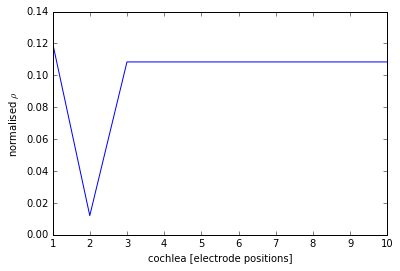

[0.12047902460181682,
 0.012047902460181682,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514,
 0.10843112214163514]

In [2]:
def ptr(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10):    #,e11,e12,e13,e14,e15
    rho = [e1,e2,e3,e4,e5,e6,e7,e8,e9,e10]#,e11,e12,e13,e14,e15#np.random.rand(15,1)
    rho = [x/(0.0001+sum(rho)) for x in rho] #normalize    
    #print(r'$\rho$ (as pdf):', rho)
    E = np.linspace(1,10,10)
    pt.plot(E,rho)    
    pt.ylabel(r'normalised $\rho$'); pt.xlabel('cochlea [electrode positions]');pt.show()  
    return rho
    
w=widgets.interactive(ptr, e1=(0, 1,0.05), e2=(0, 1,0.05), e3=(0, 1,0.05), e4=(0, 1,0.05),e5=(0, 1,0.05), 
                 e6=(0, 1,0.05), e7=(0, 1,0.05), e8=(0, 1,0.05), e9=(0, 1,0.05), e10=(0, 1,0.05))
display(w)
rho = w.result

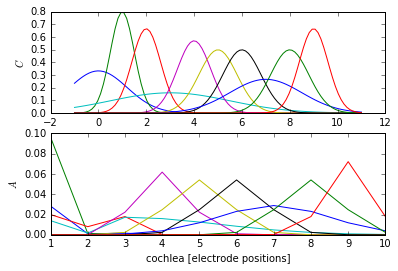

In [5]:
import matplotlib.mlab as mlab
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

rho = w.result;
E = np.linspace(1,10,10)
x = np.linspace(-1,11,100)

def ptr(w1,w2,w3,w4,w5,w6,w7,w8,w9,w10):    #,e11,e12,e13,e14,e15
    sigma = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]        
    C=[]; A=[]
    for e in range(len(E)):        
        C.append(mlab.normpdf(x,e,sigma[e]))
        A.append(np.multiply(mlab.normpdf(E,e,sigma[e]),rho))
        pt.subplot(2, 1, 1)
        pt.plot(x,C[e])
        pt.ylabel(r'$C$'); pt.xlabel('cochlea [electrode positions]')
        pt.subplot(2, 1, 2)
        pt.plot(E,A[e])
        pt.ylabel(r'$A$'); pt.xlabel('cochlea [electrode positions]')
    pt.show()
    
widgets.interact(ptr, w1=(0.1, 5,0.1), w2=(0.1, 5,0.1), w3=(0.1, 5,0.1), w4=(0.1, 5,0.1),w5=(0.1, 5,0.1), 
                 w6=(0.1, 5,0.1), w7=(0.1, 5,0.1), w8=(0.1, 5,0.1), w9=(0.1, 5,0.1), w10=(0.1, 5,0.1)) 


## Units
It is useful to check that the physiscal units are coherent throughout our equations.
Here is a possible relationship, based on Eq. [2] and [3.b]:
#### $M \sim [\mu V]$
#### $C \sim [\Omega]$
#### $\rho \sim [adim]$
#### $I \sim [\mu A]$ (current levels for stimulation)
#### $A \sim [\Omega]$ (from Eq. [b.2])
#### $[\mu V] \sim M_{ij} = I_i\cdot{}\rho\cdot{}\sum_n{\sqrt{C_i(n)\cdot{}C_j(n)}} $ (from Eq. [b.3]) $\sim [\mu A]\cdot[adim]\cdot{\sqrt{[\Omega][\Omega]}}=[\mu V]$

# Equations <a id='Eq'></a>
<li> [a.1]  $$\pmb{M}=\pmb{A}\cdot\pmb{A}^T$$</li> 
<li>  [a.2]  $$M_{ij}=\sum_n{A_i(n)\cdot{}A_j(n)}$$</li> 
<li>  [a.3]  $$A_i=\mathcal{N}(\mu,\sigma)$$</li> 
~ ~ ~ ~ ~  ~ ~
<li>  [b.1]  $$\pmb{M}=\sqrt{\pmb{A}\cdot\pmb{A}^T}$$</li> 
<li>  [b.2]  $$A_i=C_i\cdot{\rho}$$</li> 
<li>  [b.3]  $$M_{ij}=I_i\cdot{}\sum_n{\sqrt{A_i(n)\cdot{}A_j(n)}}=I_i\cdot{}\rho\cdot{}\sum_n{\sqrt{C_i(n)\cdot{}C_j(n)}}$$</li> 

## Params
$E$ : number of electrodes.
$M$ : Matrix of ECAP patterns (measurable).
$A$ : Matric of excitation (or activation) patterns; what we want to estimate.
$\rho$: vector containing neural densities along the cochlea, evaluated at the electrode locations. This is modelled as a $pdf$, and expresses the probability of the neurons existing & firing at that cochlea location.

# Previous versions of PECAP <a id='PrecVers'></a>
<li><b>v 2.2</b></li>
A "neural" element is now modelled, $\sigma$ and $\mu$ are optimized. Eq. [b.1-3] apply.
<li><b>v 2.1</b> ("GECAP")</li>
$\sigma$ and $\mu$ are fixed (with $\mu>>$num of electrodes), and the amplitude of the gaussians is optimised. Eq. [a.1] applies.
<li><b>v 1</b></li>
$\sigma$ and $\mu$ are optimized. Eq. [a1-3] apply.